In [2]:
import pandas as pd
data = '/home/nicolas/Documents/Cours/m1/projet/5 ans/allBIO2020.txt'
data1 = '/home/nicolas/Documents/Cours/m1/projet/5 ans/allBIO1980.txt'
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import numpy as np

In [3]:
df = pd.read_csv(data,sep =',',header =0 ,index_col=0)
#nombre de stations
n = df.shape[0]
#nombre de variables
p = df.shape[1]
df_past = pd.read_csv(data1,sep =',',header =0 ,index_col=0)

sc = StandardScaler()
acp = PCA(svd_solver='full')

Z = sc.fit_transform(df)
coord = acp.fit_transform(Z)

Zpast = sc.transform(df_past)
coordpast = acp.transform(Zpast)

In [4]:
infopercent = acp.explained_variance_ratio_

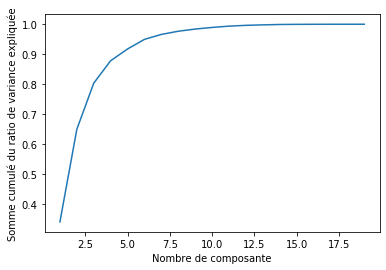

In [5]:
plt.plot(np.arange(1,p+1),np.cumsum(infopercent))
# plt.title("Détermination du nombre de composante à conserver")
plt.ylabel("Somme cumulé du ratio de variance expliquée")
plt.xlabel("Nombre de composante")
plt.show()

In [6]:
np.cumsum(infopercent)

array([0.34055617, 0.6495303 , 0.80342736, 0.87829085, 0.91745303,
       0.94956443, 0.96607734, 0.97668646, 0.983926  , 0.98935555,
       0.99370301, 0.99633364, 0.99793894, 0.99916467, 0.99963363,
       0.99986197, 0.99996225, 1.        , 1.        ])

In [7]:
eigval = (n-1) / n * acp.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'PC-1': 1*corvar[:,0], 'PC-2': 1*corvar[:,1],'PC-3': 1*corvar[:,2],'PC-4': 1*corvar[:,3]},index=df.columns) # scaled up for plot

In [23]:
coordvar

,PC-1,PC-2,PC-3,PC-4
BIO1,0.721956,-0.649602,-0.139572,0.032776
BIO2,-0.332542,-0.049622,-0.865692,-0.029847
BIO3,0.644653,-0.298301,-0.382401,-0.086857
BIO4,-0.744744,0.053095,-0.516489,0.113050
BIO5,0.473314,-0.605761,-0.559224,-0.079210
BIO6,0.845516,-0.454636,0.214600,-0.071797
BIO7,-0.704330,0.140445,-0.639605,0.033340
BIO8,0.212355,-0.462933,-0.577548,-0.182313
BIO9,0.609371,-0.361776,0.374281,0.035550
BIO10,0.553101,-0.711452,-0.286228,0.115934


In [10]:
from matplotlib.patches import Ellipse

import matplotlib.transforms as transforms


def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):

    """
    Create a plot of the covariance confidence ellipse of `x` and `y`
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """

    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.

    scale_x = np.std(x)
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...

    scale_y = np.std(y)
    mean_y = np.mean(y)
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)

    return ax.add_patch(ellipse)

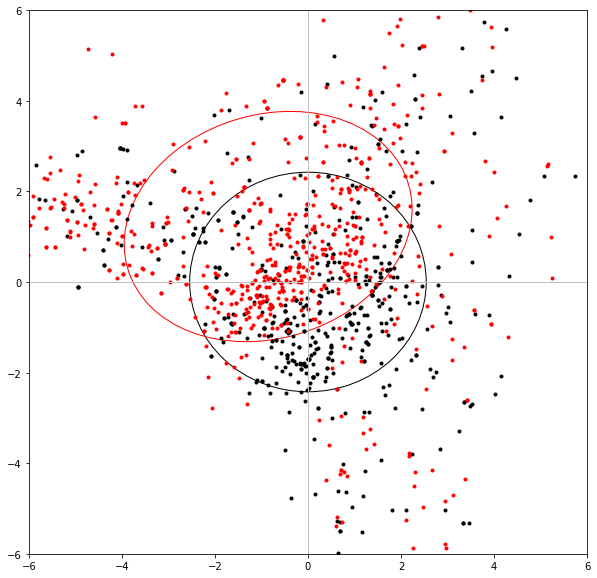

In [25]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
# for i in range(10):
    # plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
    # plt.annotate(df.index[i],(coordpast[i,0],coordpast[i,1]),color = 'red')
plt.plot(coord[:,0],coord[:,1],linestyle="",marker=".",color ='black')
plt.plot(coordpast[:,0],coordpast[:,1],linestyle="",marker=".",color = 'red')
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
confidence_ellipse(coord[:,0],coord[:,1],axes,edgecolor='black')
confidence_ellipse(coordpast[:,0],coordpast[:,1],axes,edgecolor='red')

#affichage
# fig.savefig('PCA_1_2.jpeg', format='jpeg', dpi=600)
plt.show()

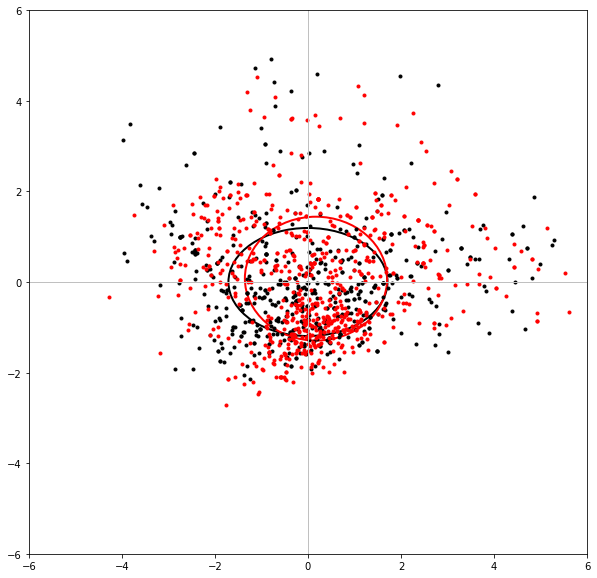

In [12]:
#positionnement des individus dans le 'second' plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
# for i in range(10):
    # plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
    # plt.annotate(df.index[i],(coordpast[i,0],coordpast[i,1]),color = 'red')
plt.plot(coord[:,2],coord[:,3],linestyle="",marker=".",color ='black')
plt.plot(coordpast[:,2],coordpast[:,3],linestyle="",marker=".",color = 'red')
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
confidence_ellipse(coord[:,2],coord[:,3],axes,edgecolor='black',linewidth=2)
confidence_ellipse(coordpast[:,2],coordpast[:,3],axes,edgecolor='red',linewidth=2)

#affichage
# fig.savefig('PCA_3_4.jpeg', format='jpeg', dpi=600)

plt.show()

In [13]:
def dist(M,MM,dim):
    l=list()
    for i in range(0,dim):
        l.append((MM[i]-M[i])*(MM[i]-M[i]))
    s = sum (l)
    d = np.sqrt(s)
    return d

In [14]:
def closestnaif(M,array):
    N = len(array[:,0])
    j=1000
    for i in range(0,N):
        jj = dist(M,array[i],dim)
        if jj <= j :
            j = jj 
            closest = i 
    return ( closest )

In [15]:
c=list()
d=list()
g=list()
dim=4

In [16]:
for i in range(0,n):
    c.append(closestnaif(coord[i,0:dim],coordpast))
    d.append(df_past.index[c[i]])
    g.append(int(df.index[i]))

In [90]:
boss = pd.DataFrame(list(zip(g,d)), columns = ['STAID(pre)','Matchingsta(past)'])
print(boss)

     STAID(pre)  Matchingsta(past)
0             2                426
1             4               2028
2             5               2028
3            10              18814
4            11               4431
..          ...                ...
599       18958               5527
600       18965              18965
601       18974               4593
602       19003               5001
603       20823              21770

[604 rows x 2 columns]


In [91]:
boss.to_csv(r'/home/nicolas/Documents/Cours/m1/projet/matchedsta.txt', index = False)

In [27]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.cm as cm

In [28]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

In [29]:
def circleOfCorrelations(pc_infos,i,j):
    plt.Circle((0,0),radius=10, color='r', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='r', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    axx=coordvar.columns[i]
    axy=coordvar.columns[j]
    for idx in range(len(pc_infos["PC-1"])):
        x = pc_infos[axx][idx]
        y = pc_infos[axy][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(pc_infos.index[idx], xy=(x,y))
    plt.xlabel(axx)
    plt.ylabel(axy)
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    # plt.title("Circle of Correlations")

# Trace un cercle : 

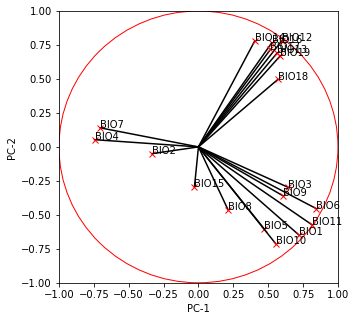

In [20]:
fig = plt.figure(figsize = (5,5))
circleOfCorrelations(coordvar,0,1)
fig.savefig('myimage.jpeg', format='jpeg', dpi=400)

# Trace tous les cercles :

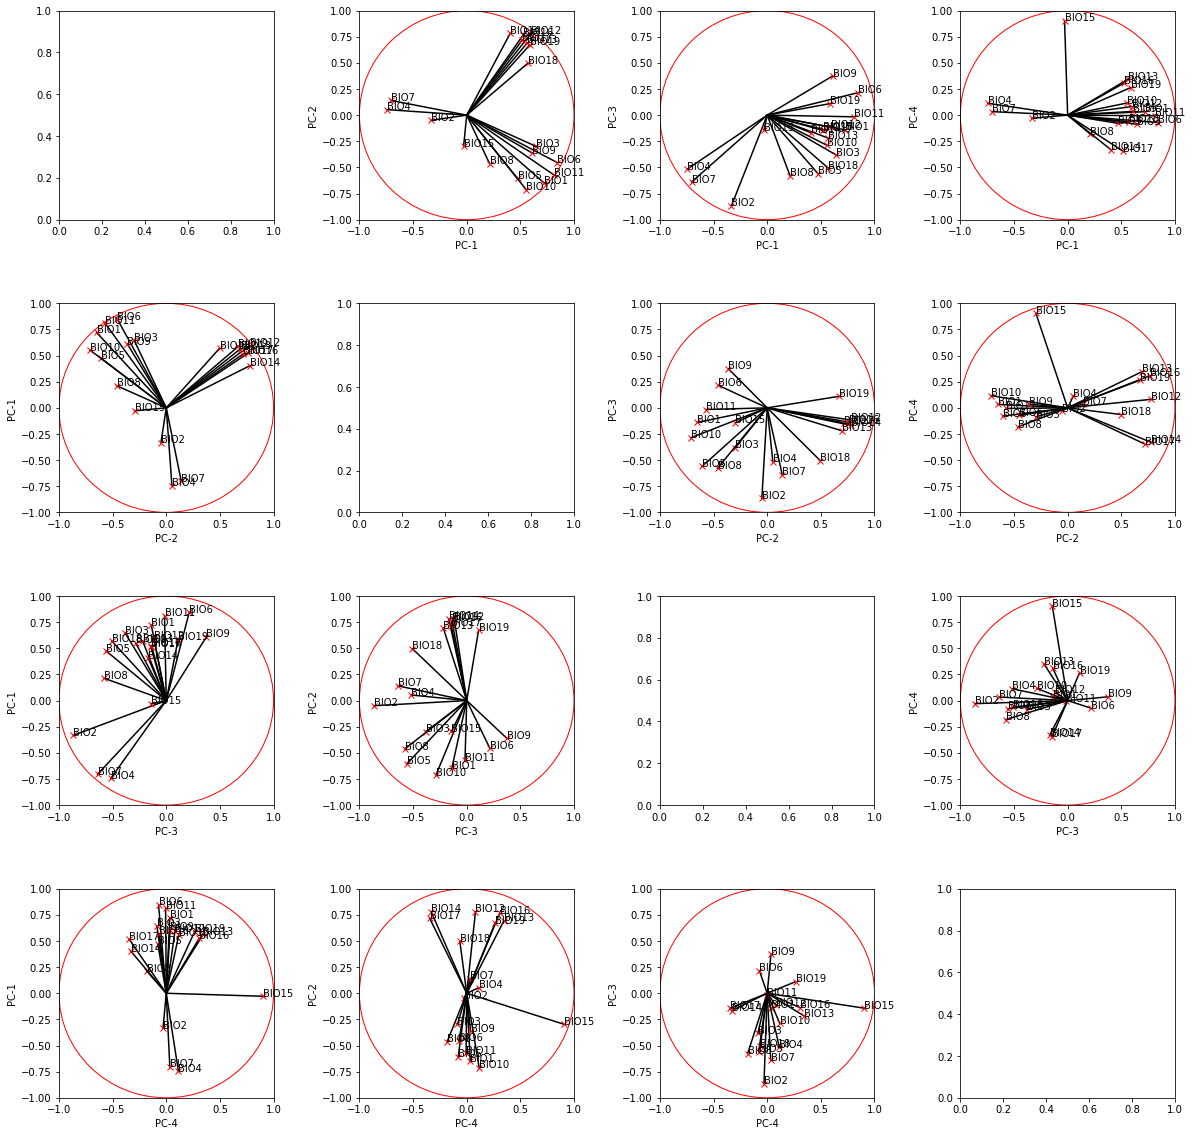

In [33]:
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
k=0
for i in range (4) :
    for j in range (4): 
        k+=1
        fig.add_subplot(4,4,k)
        if i != j :
            circleOfCorrelations(coordvar,i,j)
fig.savefig('Cerlcecorrelations_dt5ans.jpeg', format='jpeg', dpi=400)

# Trace les corrélations en fausse 4d :

prblm avec colormap,les valeurs stockées dans c me paraissent douteuse

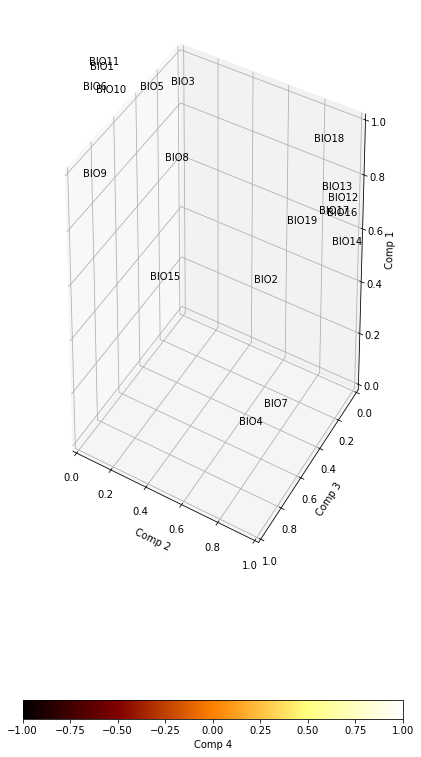

In [30]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.set_xlim3d(0, 1)
ax.set_ylim3d(1, 0)
ax.set_zlim3d(0, 1)
ax.set_xlabel('Comp 2')
ax.set_ylabel('Comp 3')
ax.set_zlabel('Comp 1')
c=cm.afmhot((coordvar['PC-4']))
cmap = plt.get_cmap('afmhot')
for j in range(p):
    ax.text(coordvar["PC-2"][j],coordvar["PC-3"][j],coordvar["PC-1"][j], coordvar.index[j])
    a = Arrow3D([0, coordvar["PC-2"][j]],
                [0, coordvar["PC-3"][j]], 
                [0, coordvar["PC-1"][j]], mutation_scale=20, 
                lw=1, arrowstyle="-|>", color=c[j])
    ax.add_artist(a)
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm,orientation="horizontal",label = "Comp 4" )
plt.show()